# Titanic - 23:18 5/10/2025


## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition homepage[https://www.kaggle.com/competitions/titanic].

#### The ultimate goal: 
- Understand the dataset
- Create a model that could achieve Kaggle score of 0.8

**Evaluation metric**: Accuracy rate.

## Preparation

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### File directories from Kaggle (I want to save dump file inside my laptop, so I'll comment this)

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\notebook6383ed8f72.ipynb
.\input\gender_submission.csv
.\input\test.csv
.\input\train.csv


### Load train.csv file

In [3]:
# titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic = pd.read_csv('./input/train.csv')
df = titanic.copy()
print("Successfully load training data.")

Successfully load training data.


## Have a look at the dataset

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Base on the output, we could say that there are 891 rows and  12 variables inside the dataset:
- **Survived**: Survival (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex: Sex (male/female)
- Age: Age in years	
- Sibsp: # of siblings / spouses aboard the Titanic	
- Parch: # of parents / children aboard the Titanic	
- Ticket: Ticket number	
- Fare: Passenger fare	
- Cabin: Cabin number	
- Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

Base on the `df.info()`, we could say there are 7 numeric variables and 5 object variables, with `Survived` being the outcome of the model. We might have to transform these object variables in a way that model can understand itself.

We can see that `Age`, `Cabin` and `Embarked` have missing values, we will explore number of missing value and it's proportion.

Look at the features information, there are four categorical variables, we will convert it into `category` type to implement analysis better.

In [6]:
for x in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    df[x] = df[x].astype('category')

In [7]:
print("===== Number of missing values =====")
df[['Age', 'Cabin', 'Embarked']].isnull().sum()

===== Number of missing values =====


Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
print("===== Percentage of missing values =====")
df[['Age', 'Cabin', 'Embarked']].isnull().sum() / len(df) * 100

===== Percentage of missing values =====


Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

The `Cabin` has lots of missing data, so we might need to find a way to handle it later.

We should also check if any rows inside the dataset duplicate each other in order to deal with it as these could affect negatively on training length.

In [9]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


There are no duplicate rows in the dataset, which is good.

We want to check it's uniqueness of each column.

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

From the result, we could see that some features do have lots of unique values, but some features (`Survived`, `Pclass`, `Sex`, `Embarked`) only have 2 - 3 different values, as it is categorical (we don't count `SibSp`, `Parch` here because it makes sense).

## Handle missing value

We need to find solutions to handle missing value.
From the output detecting missing value, here's the proportion of missing value for `Age`, `Cabin`, and `Embarked`:

- Age: 19.87%
- Cabin: 77.10%
- Embarked: 0.22%

For `Cabin` features, although the missing value percentage are pretty high, it could be a good information to show passenger's room level, which is a really crucial detail related to survivability. Furthermore, we can base on that information to know if the passengers stayed at the front part (bow) of the Titanic, which is the part of the ship that sank first.

For `Age` features, it could related to the survivability, as children and elderly usually be prioritized.

For `Embarked` features, it could related to passenger's room level (passengers go on the ship first might have room that are in higher level).

Because of that, I think that we should not remove these features. We need to handle value instead.

### Handle missing age value

Honorific title inside passengers' name could tell us a little about their age, so we will fill missing values with median of value `Age` splited by 5 main groups: Mr, Mrs, Master, Miss, and other.

In [11]:
mr = df['Name'].str.contains(r',\s*Mr\.', regex=True)
mrs = df['Name'].str.contains(r',\s*Mrs\.', regex=True)
master = df['Name'].str.contains(r',\s*Master.', regex=True)
miss = df['Name'].str.contains(r',\s*Miss.', regex=True)
other = ~(mr | mrs | master | miss)

print(f"Mr.: {mr.sum()}")
print(f"Mrs.: {mrs.sum()}")
print(f"Master.: {master.sum()}")
print(f"Miss.: {miss.sum()}")
print(f"Other: {other.sum()}")

Mr.: 517
Mrs.: 125
Master.: 40
Miss.: 182
Other: 27


Survivability of these people

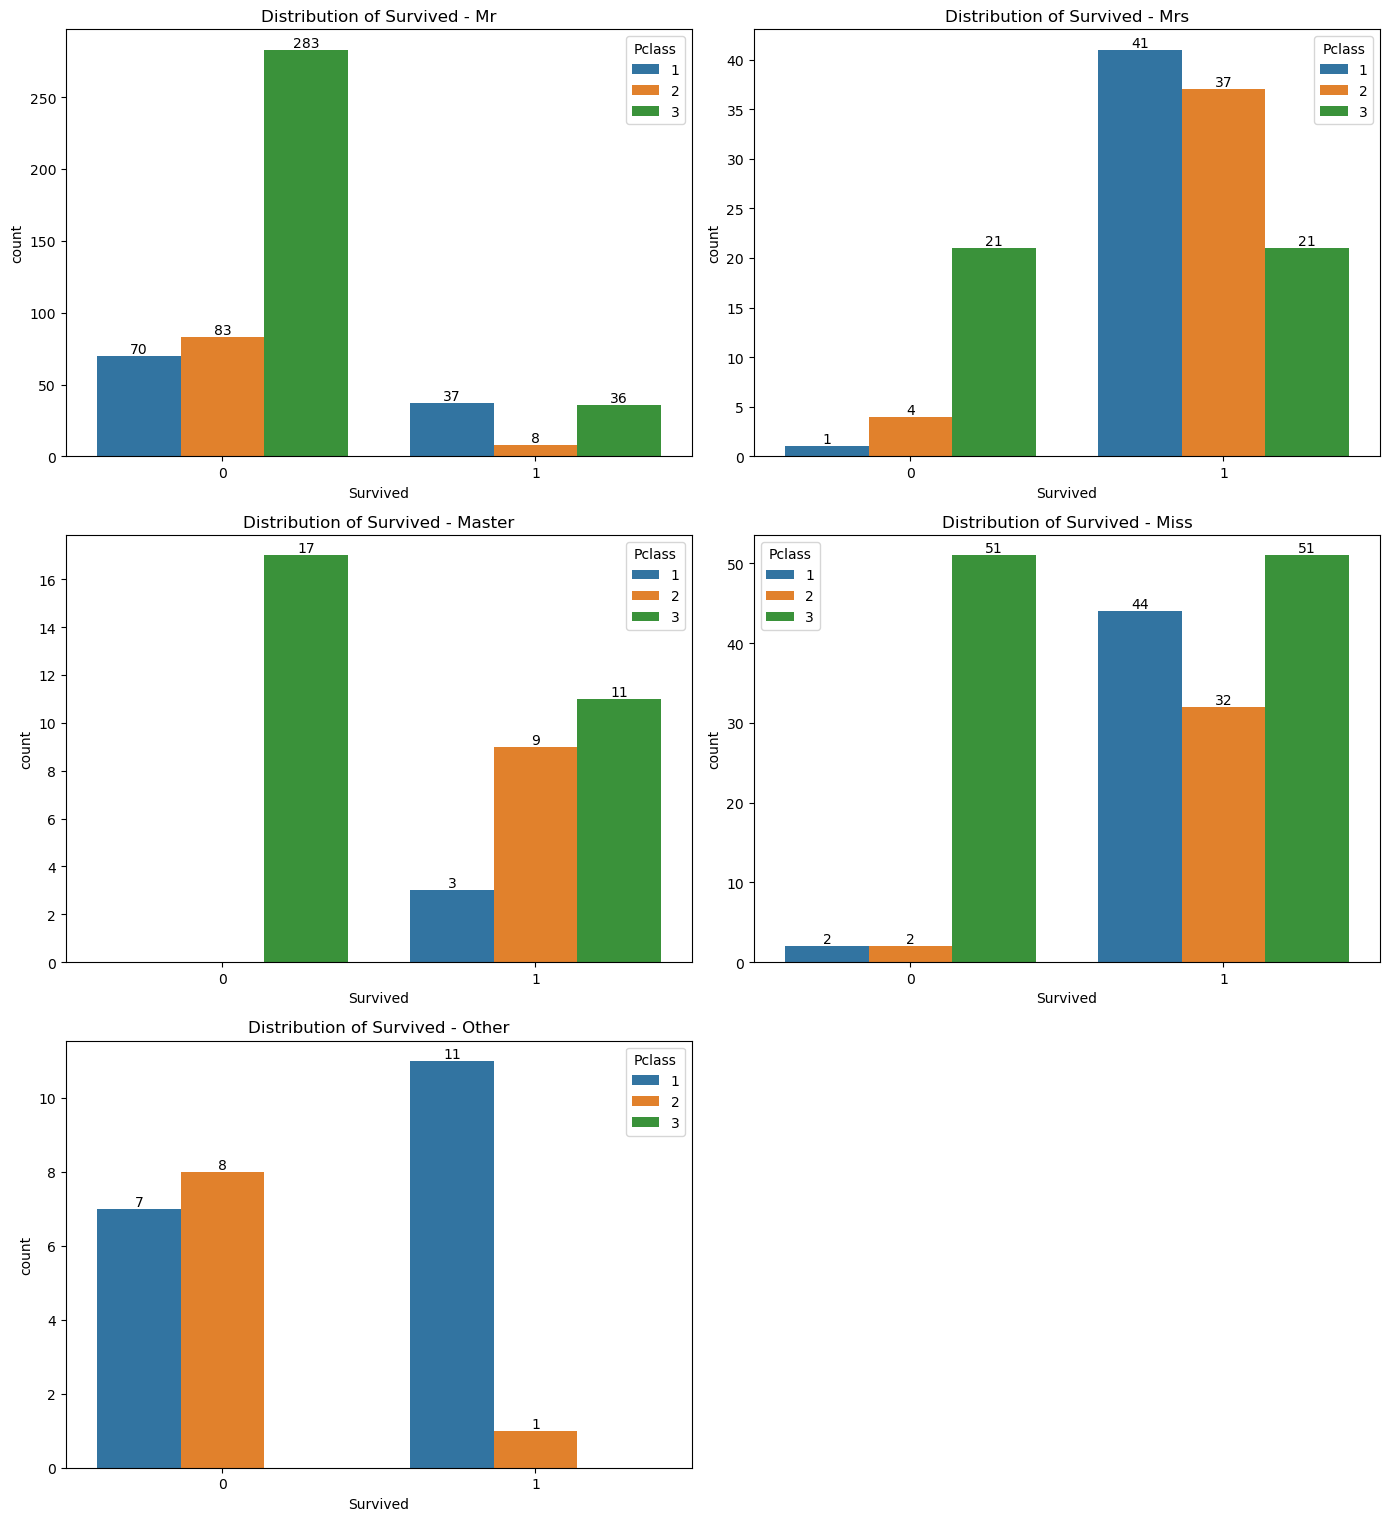

In [12]:
df_list = [mr, mrs, master, miss, other]
names = ["Mr", "Mrs", "Master", "Miss", "Other"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Pclass')
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

In [13]:
df_master = df[master].copy()
df_master['Age'] = df_master['Age'].fillna(df_master['Age'].median())
df[master] = df_master

df_mr = df[mr].copy()
df_mr['Age'] = df_mr['Age'].fillna(df_mr['Age'].median())
df[mr] = df_mr

df_mrs = df[mrs].copy()
df_mrs['Age'] = df_mrs['Age'].fillna(df_mrs['Age'].median())
df[mrs] = df_mrs

df_miss = df[miss].copy()
df_miss['Age'] = df_miss['Age'].fillna(df_miss['Age'].median())
df[miss] = df_miss

df_other = df[other].copy()
df_other['Age'] = df_other['Age'].fillna(df_other['Age'].median())
df[other] = df_other

### Handle missing Cabin and Embarked value

Perhaps the only features that we could use to guess people's cabin is Ticket number, but since there are no ticket number system, we could not conclude anything from that.

Although there should have some resources online, but for now, I will just fill missing value with "U", which means "undefined"

As for Embarked value, I'll choose "S" to fill that, as the primary embarked point is Southampton (Titanic trip started from there)

In [14]:
df['Cabin'] = df['Cabin'].fillna("U")
df['Embarked'] = df['Embarked'].fillna("S")

In [15]:
print("===== Percentage of missing values =====")
df[['Age', 'Cabin', 'Embarked']].isnull().sum() / len(df) * 100

===== Percentage of missing values =====


Age         0.0
Cabin       0.0
Embarked    0.0
dtype: float64

# Note
sau khi tui nghiên cứu sơ sơ, thì tôi tìm được rất nhiều thứ hay ho về vụ titanic, mà có thế giúp ích được cho mình trong việc tạo mô hình dự đoán.
Các đường link:
- https://titanicll.co.uk/wp-content/uploads/2020/07/2020-07-06-1.png: Ảnh hiển thị map tàu Titanic một cách tổng quan 
- https://www.encyclopedia-titanica.org/titanic-deckplans/: Sơ đồ từng deck tàu titanic
- https://www.encyclopedia-titanica.org/cabins.html/: Danh sách các passengers và cabin mà họ được chỉ định để ở
- https://en.wikipedia.org/wiki/Titanic#Survivors_and_victims/: Thông tin về những người nạn nhân và những người sống sót (Tỉ lệ khá chi tiết)
- https://en.wikipedia.org/wiki/File:1912_Titanic_itinerary_europe_EN.svg/: Lịch trình của tàu Titanic
- https://www.perplexity.ai/search/which-part-of-the-titanic-sank-QDtlA9PNSSGlHF7LzOKxjw#0/: Thông tin về bộ phận nào của tàu chìm trước + Hình ảnh về các chi tiết có lẽ cũng đáng chú ý của tàu Titanic

Theo như tôi được biết, thì mình không được sử dụng những nguồn này như là nguồn bài báo chính thống, vì bản thân những nguồn này không được coi như là nguồn chính thống, uy tín. Nhưng nó có được liên kết với các bài báo chính thống, mình có thể xem các bài báo được liên kết từ các trang đó.

Tiếp theo, tui muốn tui sẽ quyết định xem giải quyết missing value như thế nào.

UPDATE 8:59PM 5-10-2025

oke sau khi chạy này kia xong tôi quyết định chủ yếu coi mức độ sống sót dựa trên giới tính và độ tuổi:
- với nam
    - nếu như trẻ nhỏ hơn hoặc bằng 12 tuổi (Master):
        - nếu ở class 1 và 2, sống 100%,
        - class 3 thì 50/50
    - nếu từ 12 - 18 tuổi
        - ở class 1 và 2 tỉ lệ sống rất cao, tổng 14ng có 2ng class 2 chết
        - class 3 chết đc 2/3
- với nữ
    - nếu trẻ nhỏ hơn hoặc bằng 12 tuổi:
        - ở class 1 chỉ có 1 trường hợp và chết
        - class 2 thì sống 100%
        - class 3 thì 50/50
    - nếu từ 12 - 18 tuổi:
        - ở cả ba class tỉ lệ sống rất cao (class 3 chỉ có 4ng chết còn lại sống hết)

# đừng để ý mấy này

### split outcome column from the dataset

In [16]:
df_outcome = df['Survived']
df_input = df.drop(['Survived'], axis=1)
df_input.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


## Univariate

In [17]:
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1) # remove these feature because 1. not analyze it yet and 2. have other things to show that features (Pclass instead of fare and cabin and ticket)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
df_input = df.drop(['Survived'], axis=1)

### descriptive analysis

In [18]:
df.describe().apply(lambda x: x.apply('{: .2f}'.format))

,Age,SibSp,Parch
count,891.00,891.00,891.00
mean,29.39,0.52,0.38
std,13.26,1.10,0.81
min,0.42,0.00,0.00
25%,21.00,0.00,0.00
50%,30.00,0.00,0.00
75%,35.00,1.00,0.00
max,80.00,8.00,6.00


### Check duplicate values

In [19]:
print(df[df.duplicated()])

    Survived Pclass Sex   Age  SibSp  Parch Embarked
32         1      3   1  21.0      0      0        2
42         0      3   0  30.0      0      0        0
45         0      3   0  30.0      0      0        1
47         1      3   1  21.0      0      0        2
51         0      3   0  21.0      0      0        1
..       ...    ...  ..   ...    ...    ...      ...
881        0      3   0  33.0      0      0        1
882        0      3   1  22.0      0      0        1
883        0      2   0  28.0      0      0        1
884        0      3   0  25.0      0      0        1
886        0      2   0  27.0      0      0        1

[310 rows x 7 columns]


### Numeric variables

#### Density plot

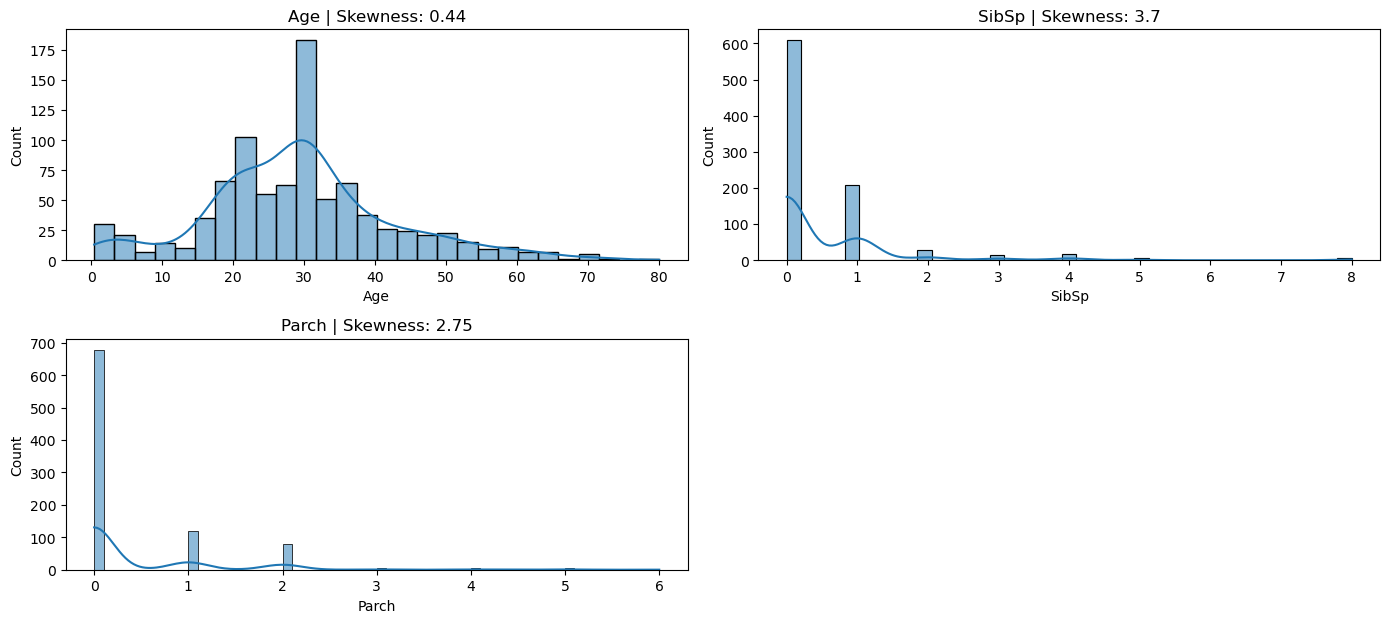

In [20]:
numerical_columns = df_input.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Boxplot

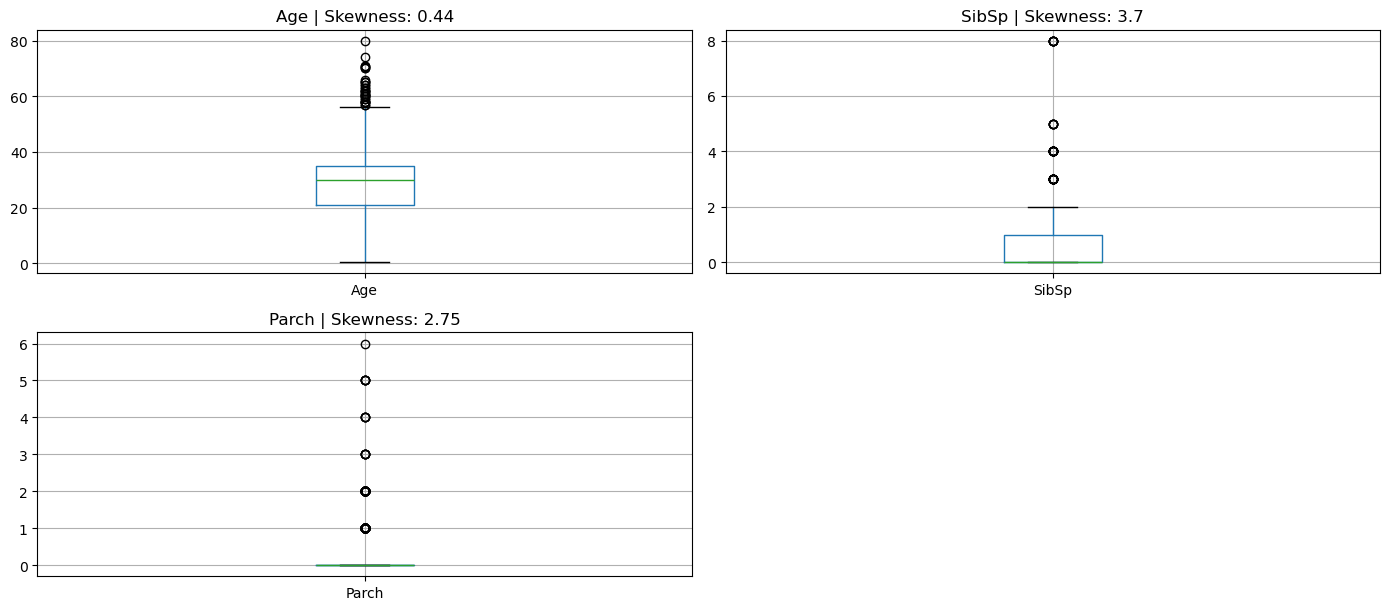

In [21]:
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    df.boxplot(column=feature)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

### Categorical variables

#### Countplot

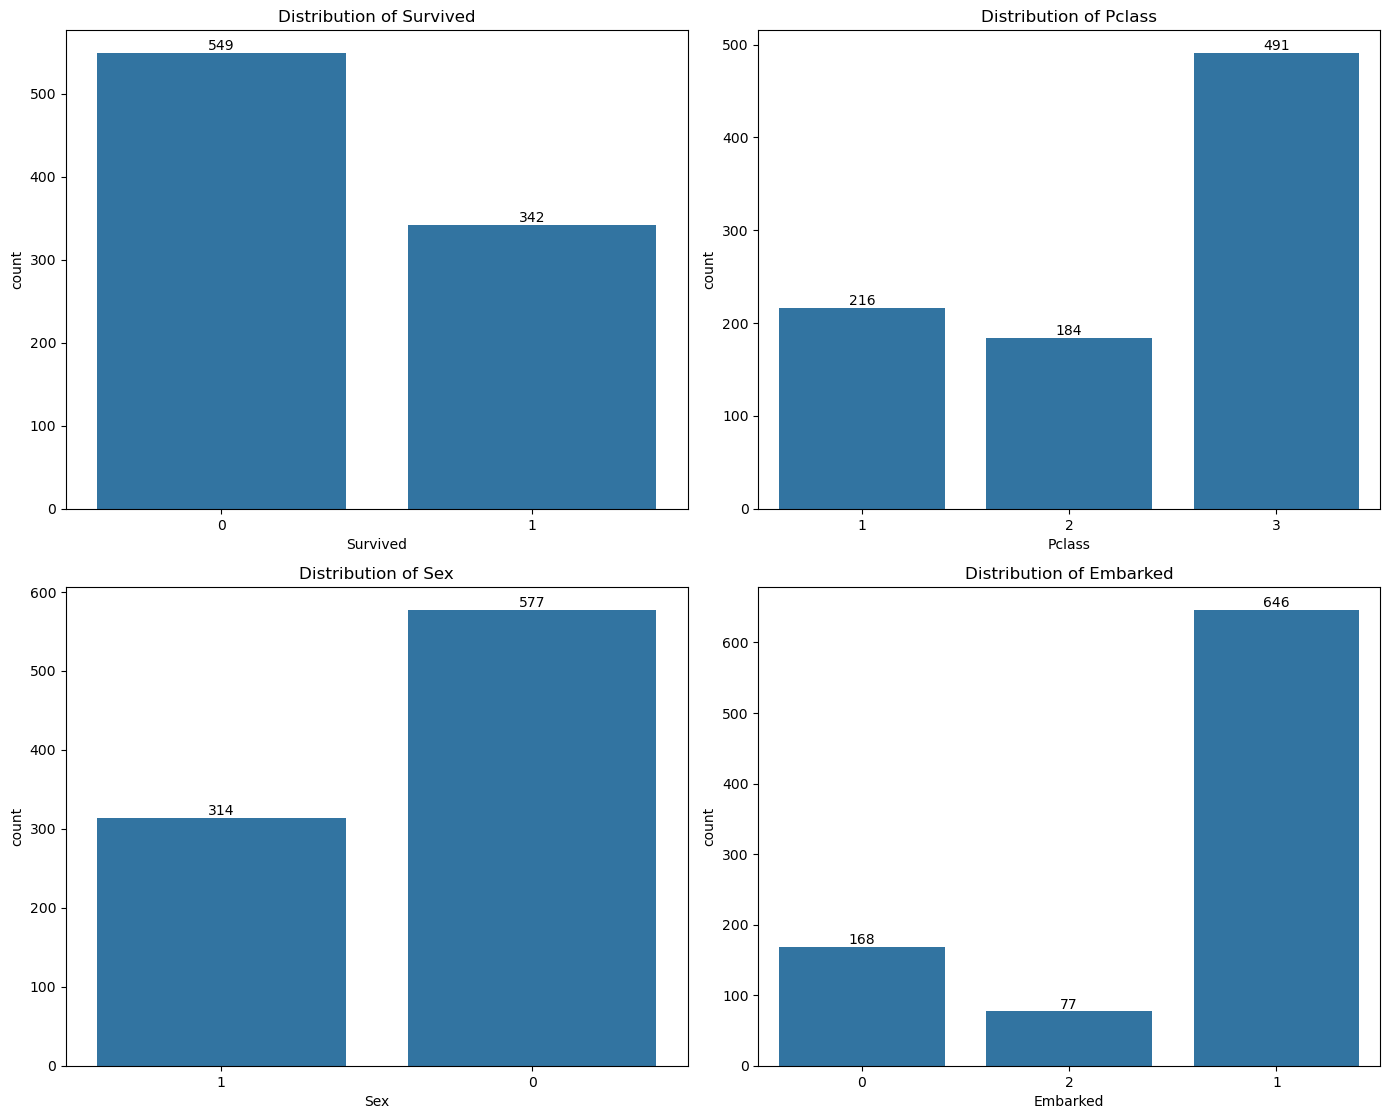

In [22]:
categorical_columns = df.select_dtypes(include=["category"]).columns
plt.figure(figsize=(14, len(categorical_columns) * 3 + 10))
for idx, feature in enumerate(categorical_columns, 1):
    # print(feature)
    plt.subplot(len(categorical_columns), 2, idx)
    sns.countplot(data=df, x=feature)
    plt.title('Distribution of ' + feature)
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

## Bivariate

### Survivability of people base on age

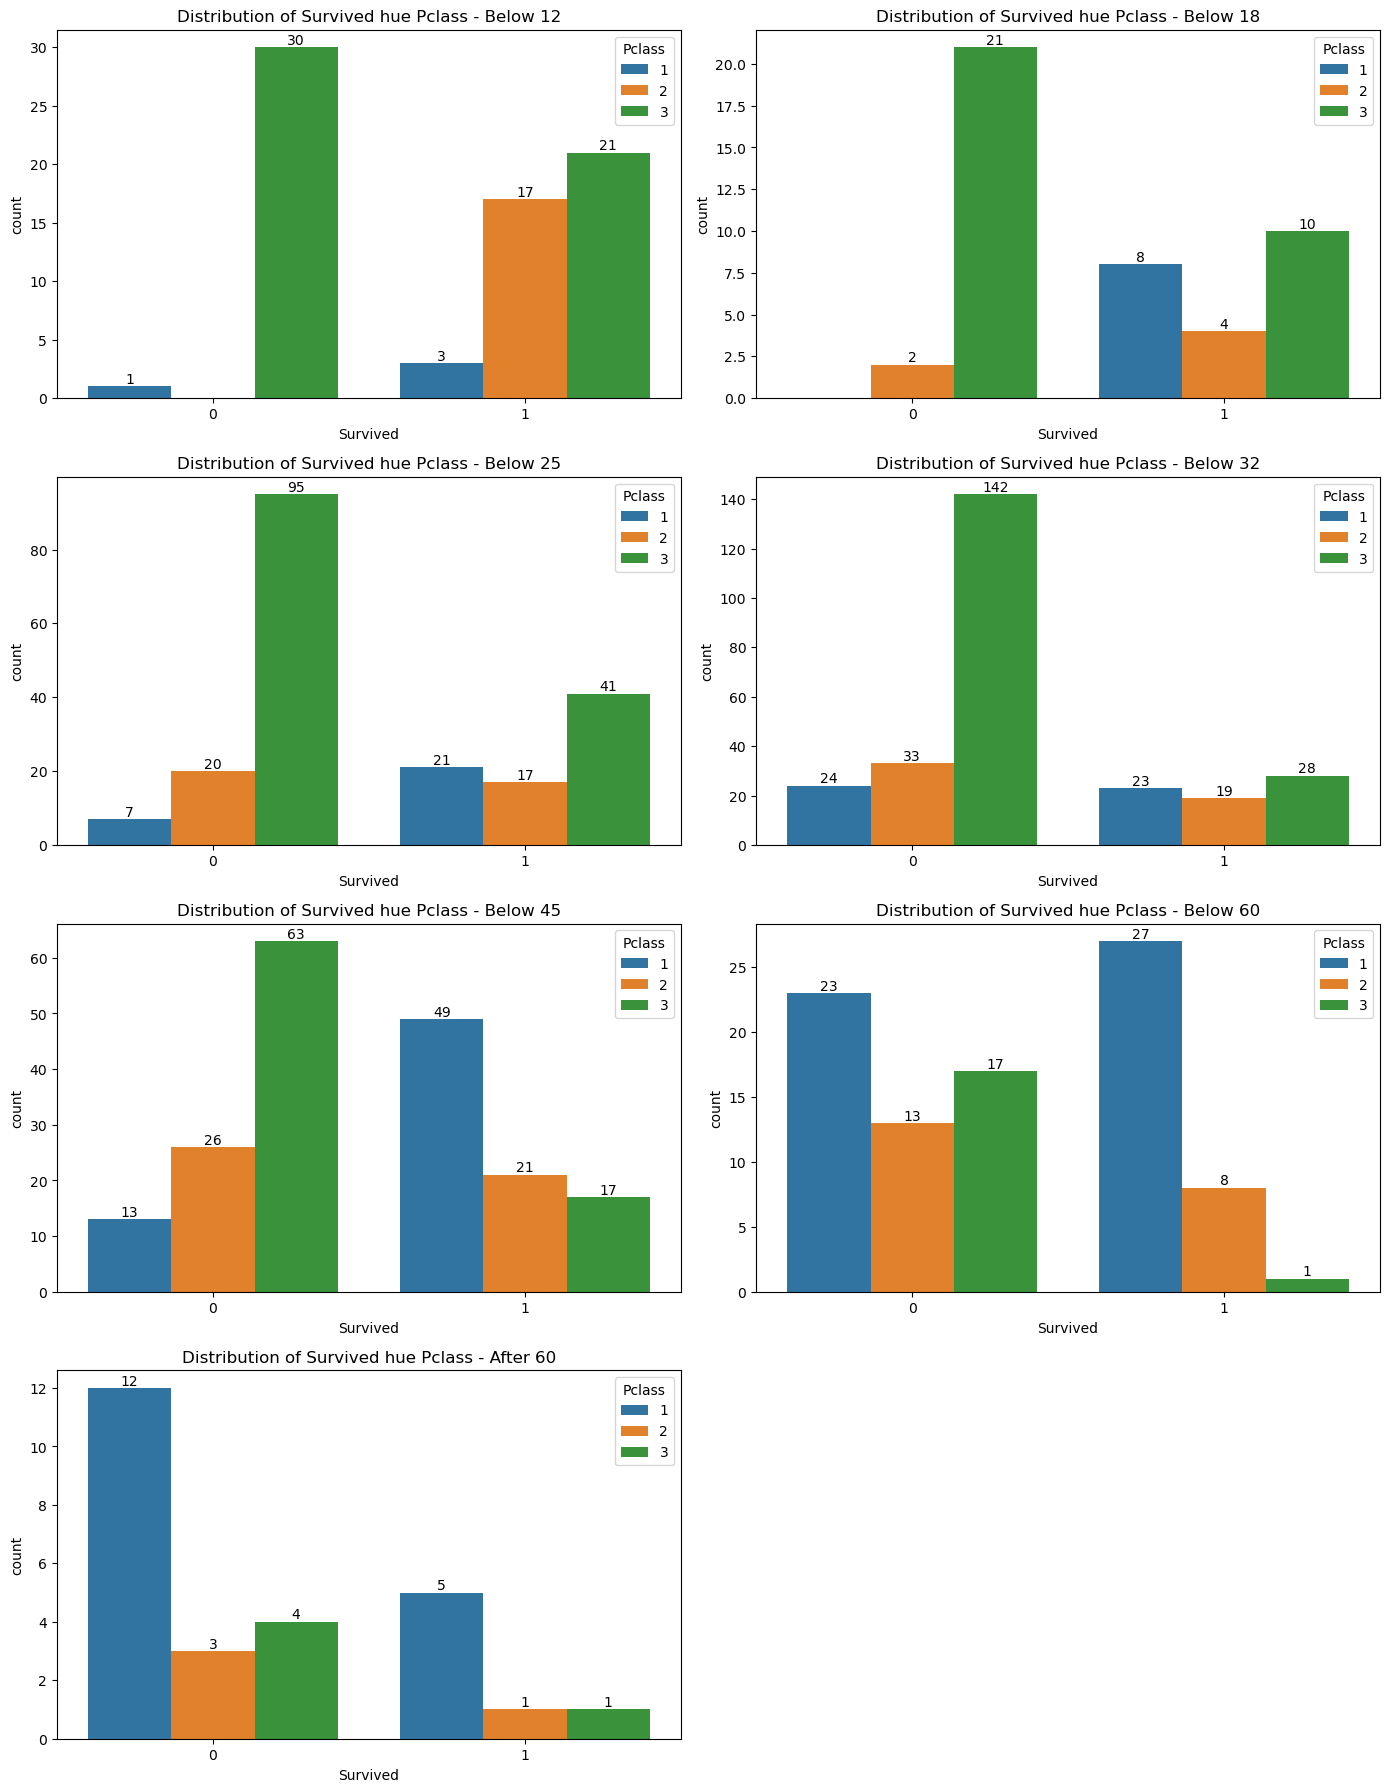

In [23]:
below_12 = df["Age"].apply(lambda x: x < 12)
below_18 = df["Age"].apply(lambda x: x < 18 and x >= 12)
below_25 = df["Age"].apply(lambda x: x < 25 and x >= 18)
below_32 = df["Age"].apply(lambda x: x < 32 and x >= 25)
below_45 = df["Age"].apply(lambda x: x < 45 and x >= 32)
below_60 = df["Age"].apply(lambda x: x < 60 and x >= 45)
after_60 = df["Age"].apply(lambda x: x >= 60)

df_list = [below_12, below_18, below_25, below_32, below_45, below_60, after_60]
names = ["Below 12", "Below 18", "Below 25", "Below 32", "Below 45", "Below 60", "After 60"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Pclass')
    plt.title(f'Distribution of Survived hue Pclass - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

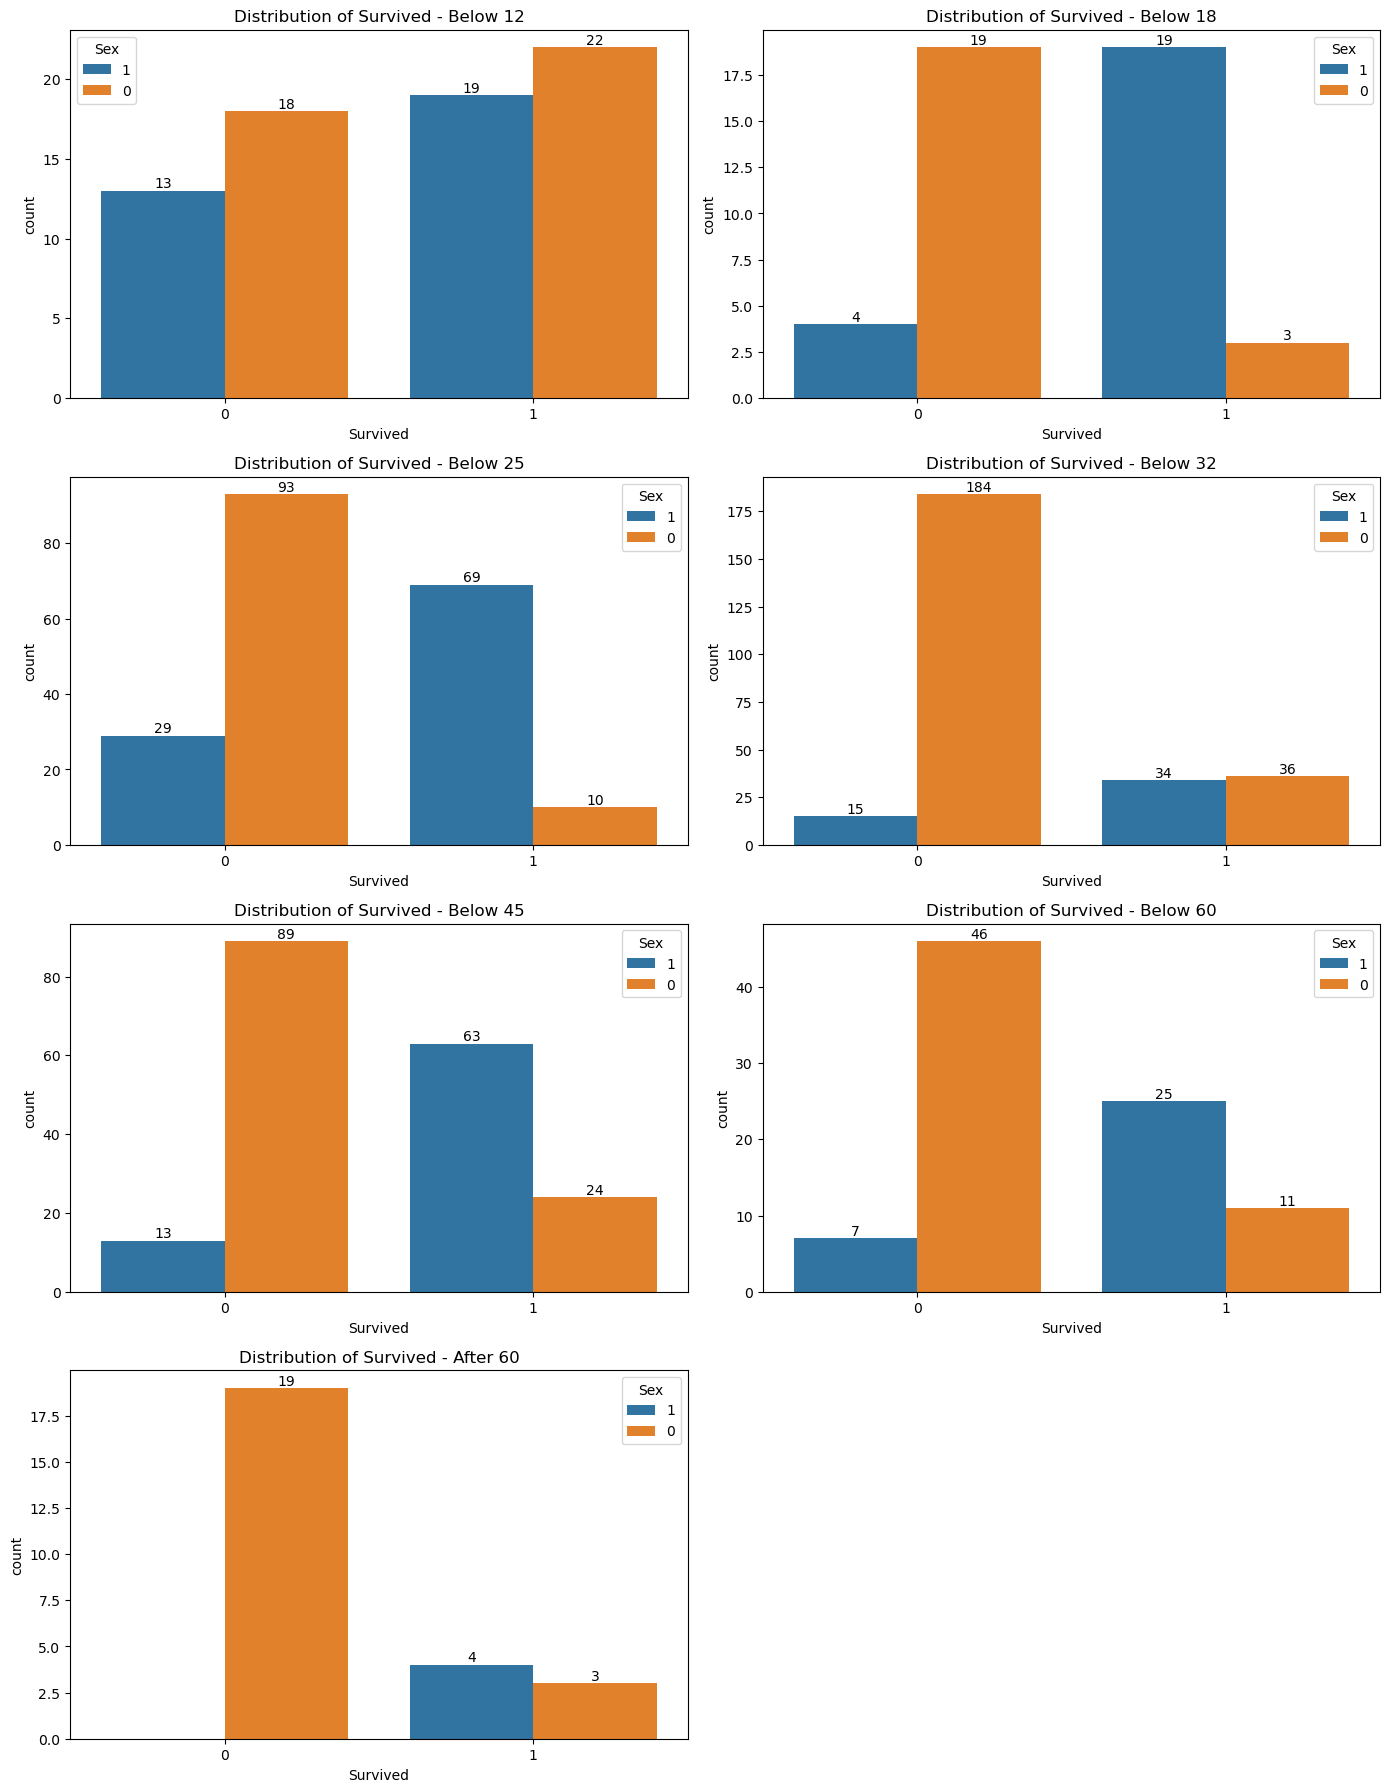

In [24]:
# below_12 = df["Age"].apply(lambda x: x < 12)
# below_18 = df["Age"].apply(lambda x: x < 18 and x >= 12)
# below_25 = df["Age"].apply(lambda x: x < 25 and x >= 18)
# below_32 = df["Age"].apply(lambda x: x < 32 and x >= 25)
# below_45 = df["Age"].apply(lambda x: x < 45 and x >= 32)
# below_60 = df["Age"].apply(lambda x: x < 60 and x >= 45)
# after_60 = df["Age"].apply(lambda x: x >= 60)

# df_list = [below_12, below_18, below_25, below_32, below_45, below_60, after_60]
# names = ["Below 12", "Below 18", "Below 25", "Below 32", "Below 45", "Below 60", "After 60"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Sex')
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

### Pairplot (Numeric variables)

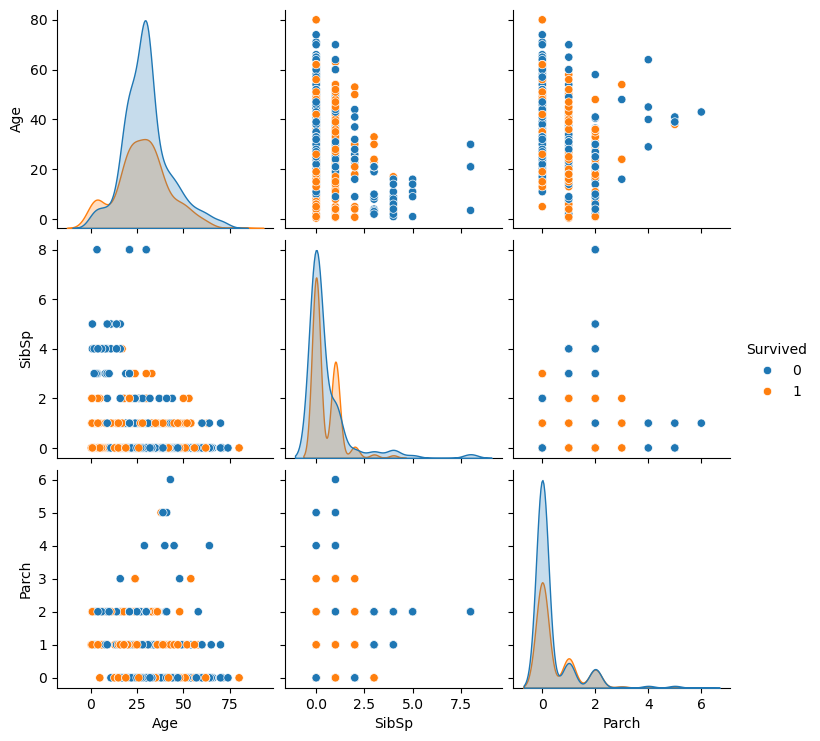

In [25]:
sns.pairplot(df, hue='Survived', diag_kind="kde")
plt.show()

### Correlation heatmap

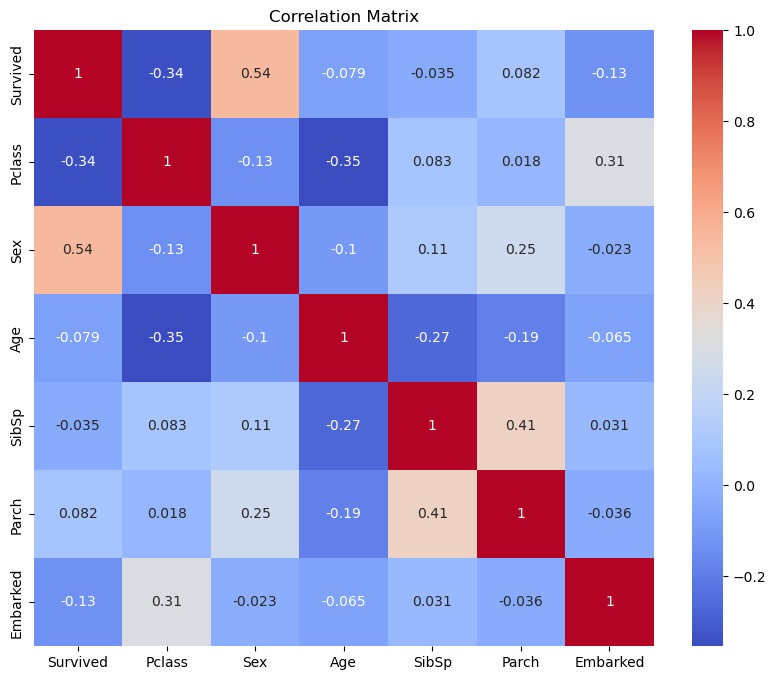

In [26]:
# df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# df['Embarked'] = df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Multivariate

not done

## Model (AI generated)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Prepare input and output
X = df_input
y = df_outcome.astype(int)  # Ensure target is integer

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Save model to file
joblib.dump(model, "titanic_random_forest_model_v1.joblib")
print("Model saved to titanic_random_forest_model_v1.joblib")

Validation Accuracy: 0.8212
Model saved to titanic_random_forest_model.joblib


## Evaluate performance (AI Generated)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model performance on test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[91 14]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Prediction on test sets (AI Generated)

In [30]:
# Load test set
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df = pd.read_csv('./input/test.csv')

# Preprocess test set to match training features
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
# test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())

# Drop columns not used in training
X_submit = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

# The error occurs because 'Fare' column was already dropped from df, so df['Fare'] does not exist.
# Instead, use test_df['Fare'].median() to fill missing Fare values in test_df itself.
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
submit_pred = model.predict(X_submit)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': submit_pred.astype(int)
})

# Export to CSV
submission.to_csv('submit_prediction.csv', index=False)
print("Prediction file saved as submit_prediction.csv")

Prediction file saved as submit_prediction.csv


# The end